In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten

In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

# train_path = 'Datasets/train'
train_path = 'C:/sers/Administrateur/Projet_Pneumonie/chest_xray/train'
# valid_path = 'Datasets/test'
valid_path = 'C:/Users/Administrateur/Projet_Pneumonie/chest_xray/test'

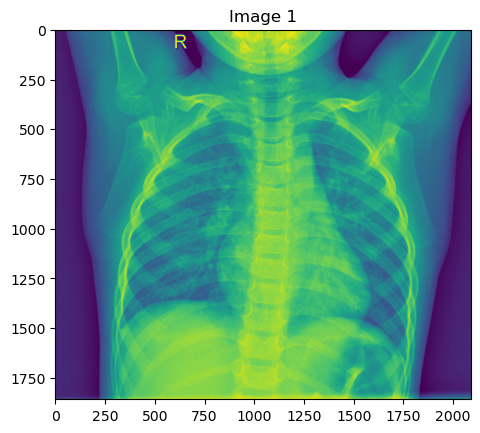

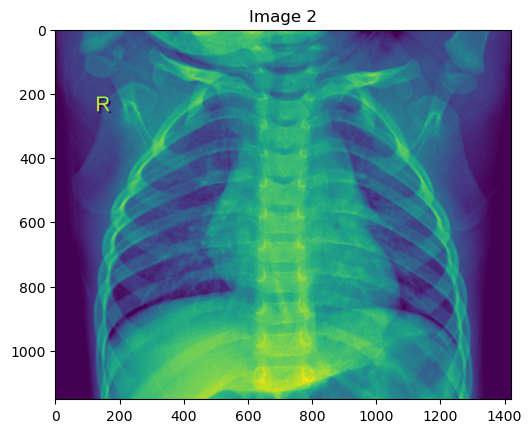

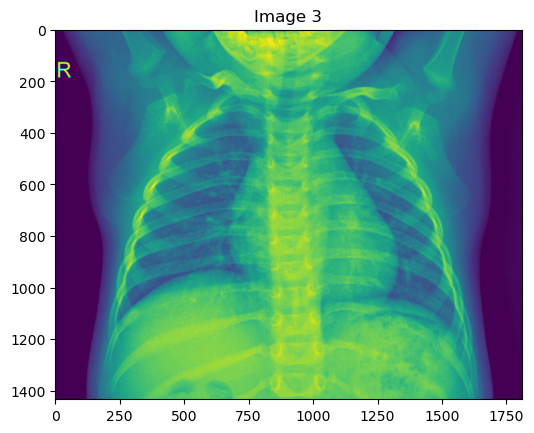

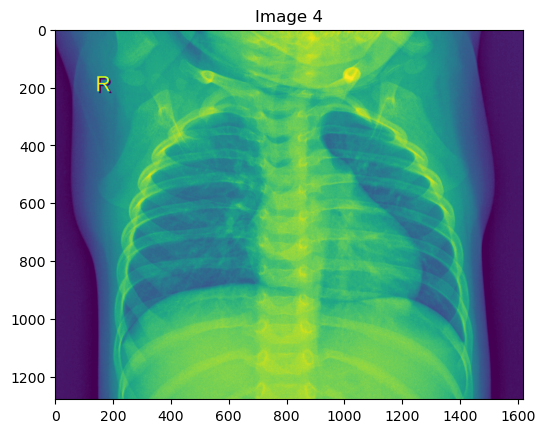

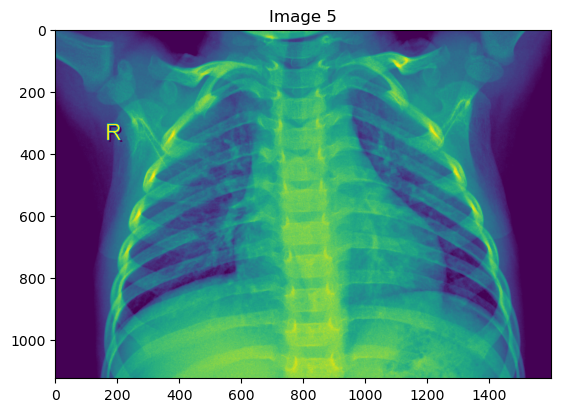

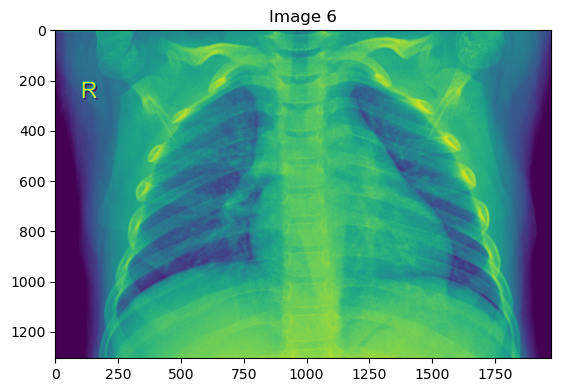

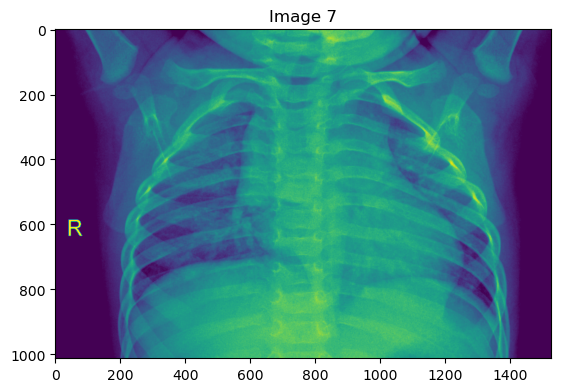

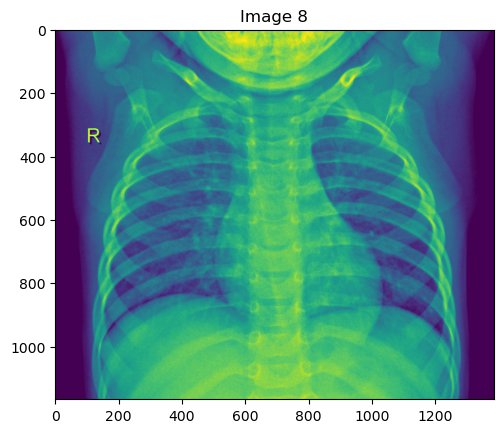

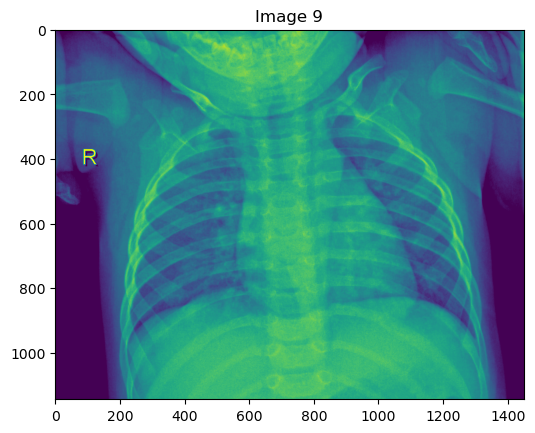

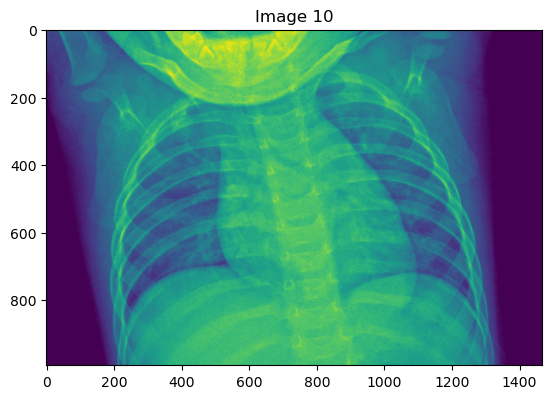

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'path_to_your_dataset_folder' with the actual path to your dataset folder
dataset_folder = 'C:/Users/Administrateur/Projet_Pneumonie/chest_xray/train/NORMAL'
# Get a list of image files in the dataset folder
image_files = sorted([f for f in os.listdir(dataset_folder) if f.endswith('.jpeg')])# or f.endswith('.png')])
# Display the first ten images
for i in range(10):
    # Construct the path to the image file
    image_path = os.path.join(dataset_folder, image_files[i])

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.show()

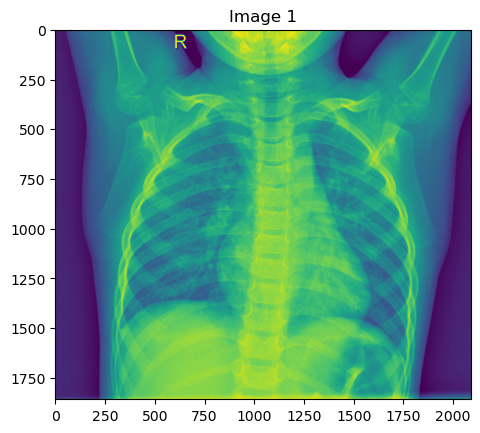

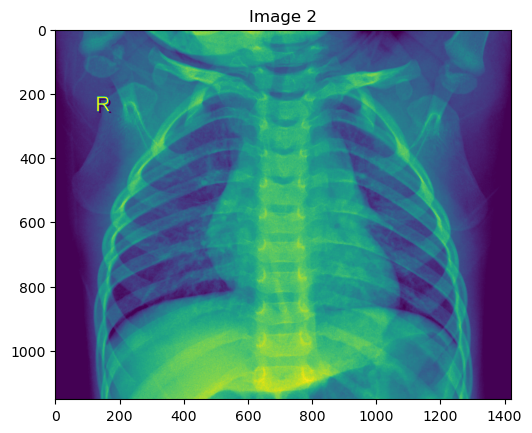

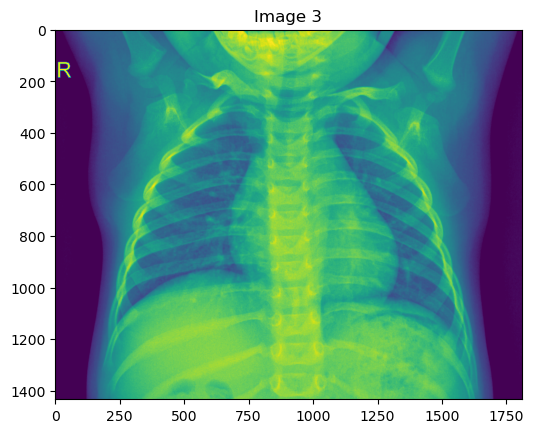

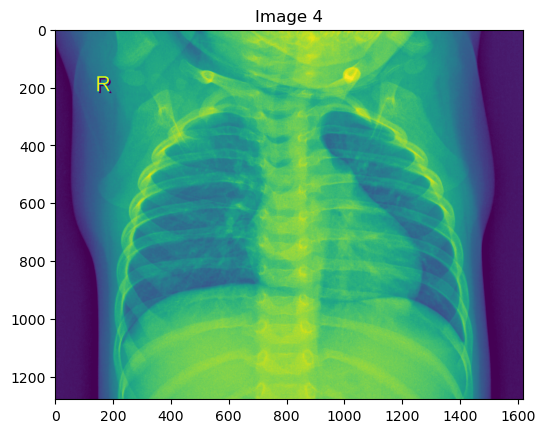

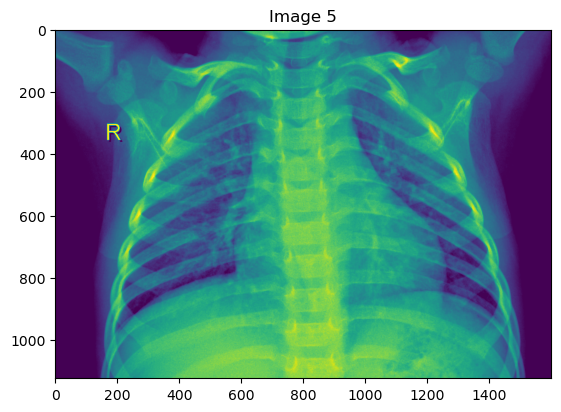

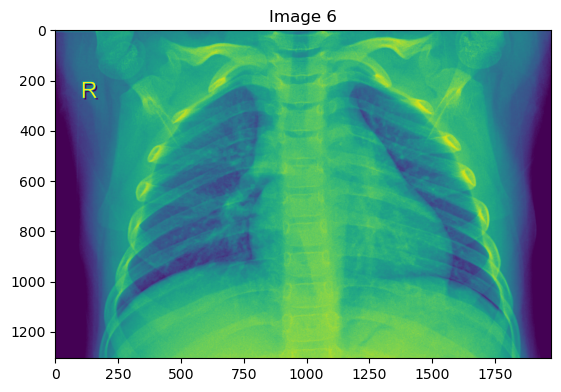

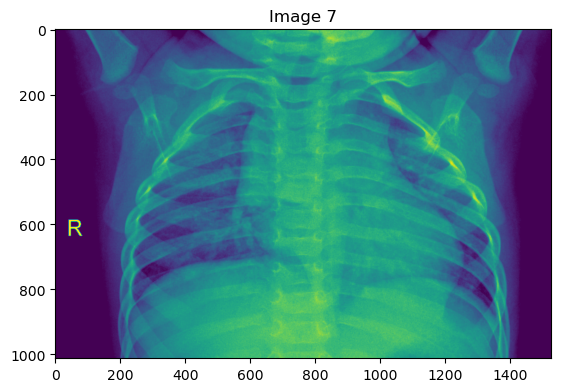

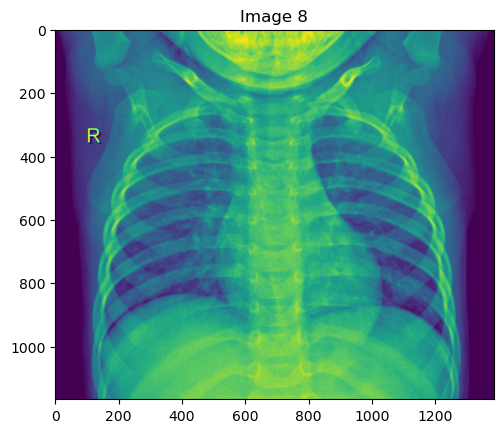

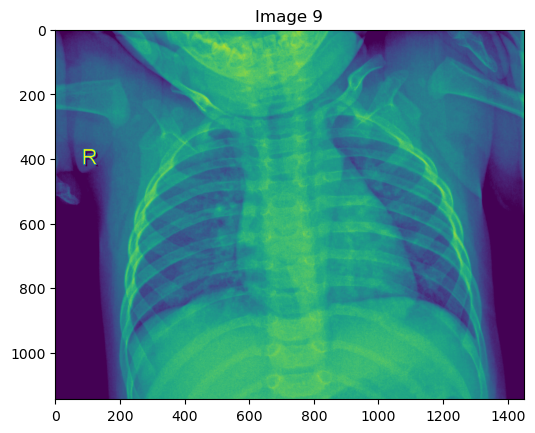

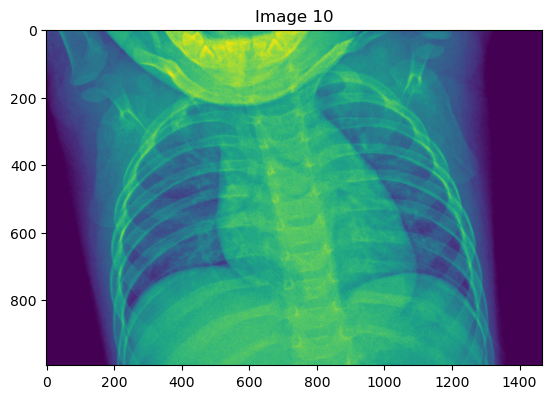

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
for layer in vgg.layers:
    layer.trainable = False

In [12]:
folders = glob('C:/Users/Administrateur/Projet_Pneumonie/chest_xray/train\*')
x = Flatten()(vgg.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics='accuracy'
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/Administrateur/Projet_Pneumonie/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('C:/Users\Administrateur/Projet_Pneumonie/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [17]:
# r = model.fit_generator(
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



522/522 [==============================] - 1792s 3s/step - loss: 0.2247 - accuracy: 0.9220 - val_loss: 0.3360 - val_accuracy: 0.8974


In [18]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [19]:
from keras.models import load_model

In [26]:
from keras.preprocessing import image

In [27]:
from keras.applications.vgg16 import preprocess_input

In [28]:
import numpy as np

In [29]:
model=load_model('chest_xray.h5')

In [31]:
img=image.image_utils.load_img('C:\\Users/Administrateur\\Projet_Pneumonie\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1431-0001.jpeg',target_size=(224,224))

In [33]:
x=image.image_utils.img_to_array(img)

In [34]:
x=np.expand_dims(x, axis=0)

In [35]:
img_data=preprocess_input(x)

In [36]:
classes=model.predict(img_data)

1/1 [==============================] - 1s 607ms/step


In [37]:
result=int(classes[0][0])

In [38]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Result is Normal


In [61]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'